In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import sys

In [2]:
pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.


In [3]:
import import_ipynb
import AdjacencyList as adja

importing Jupyter notebook from AdjacencyList.ipynb


In [4]:
adj = adja.generateAdjacencyList()
matrix = """
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
"""
mat = [[int(c) for c in line] for line in matrix.strip().split('\n')]

In [5]:
import import_ipynb
import player as p

importing Jupyter notebook from player.ipynb
importing Jupyter notebook from convert.ipynb
importing Jupyter notebook from bfs2.ipynb
importing Jupyter notebook from nodeDelete.ipynb
importing Jupyter notebook from backtracking.ipynb


In [6]:
import import_ipynb
import wall as w

importing Jupyter notebook from wall.ipynb


In [7]:
import import_ipynb
import dfs as dfspath
import bfs as bfspath
import bfs2 as bfspath2
import backtracking as backtrackingpath

importing Jupyter notebook from dfs.ipynb
importing Jupyter notebook from bfs.ipynb


In [8]:
import import_ipynb
import nodeDelete as nd

In [9]:
leaderboard = []
paths = []
contadores = []

In [10]:
def initCont(contadores, nop, paths):
    contadores = [[len(paths[i]), 0] for i in range(nop)]
    return contadores

In [11]:
def showPositions(leaderboard):
    print("The positions are:")
    names = ['Las cobras', 'La Brigada', 'Los Leones', 'El Peloton']

    for i in range(len(leaderboard)):
        print("Place", i+1, "-> Team", names[leaderboard[i]])

def setLeaderboard(paths):
    lenghts = []
    positions = []
    leaderboard = []
    for i in range(len(paths)):
        lenghts.append(len(paths[i]))
    for i in range(len(paths)):
        positions.append(i)
    positions = [x for y, x in sorted(zip(lenghts, positions))]
    lenghts.sort()
    leaderboard = positions
    #showPositions(leaderboard)
    return leaderboard

def showPaths(paths):
    names = ['Las cobras', 'La Brigada', 'Los Leones', 'El Peloton']
    for i in range(len(paths)):
        print(names[i], "team has a path of:", paths[i])

def updatePaths(paths, players, adj):
    for i in range(len(players)):
        paths[i] = bfspath2.findPathBFS(adj, p.players[i])
    return paths


In [12]:
class Game:
    def __init__(self, nop):
        self.nop = nop
        
    def startGame(self):
        Game.addPlayers(self.nop)
        w.addWalls(self.nop)
        self.initPaths()
        self.game()

    def drawQuoridorBoard(self):
        bo = np.zeros((17, 17, 3)) #(9, 9) = 9x9 board size + spaces between for walls
        #total of 17x17 board
        bo += 0.8 #opactiy of black spaces
        bo[ ::2, ::2] = 1
        bo[0::2, 0::2] = 1
        
        fig, ax = plt.subplots(figsize=(7,7)) #figsize = size of the board
        ax.imshow(bo, interpolation='nearest')

        Game.drawPlayers(ax)

        w.drawWalls(ax)

        ax.set(xticks=[], yticks=[])
        ax.axis('image')

        plt.show()
        
    def game(self):
        self.drawQuoridorBoard()
        #checks if a player reached the opposite side
        gameover = self.checkWinner()

        return gameover

    def checkWinner(self):
        finish_line = [16,0,16,0]
        for pl in p.players:
            i = pl.id - 1
            if (pl.id <= 2):
                if(pl.x == finish_line[i]):
                    print("GAME OVER")
                    print(pl.name, "team wins")
                    return True
            else:
                if(pl.y == finish_line[i]):
                    print("GAME OVER")
                    print(pl.name, "team wins")
                    return True
        return False

    def addPlayers(nop):
        initState = [[0, 8, 'royalblue', 'Las Cobras'], [16,8,'limegreen', 'La Brigada'], 
                 [8, 0, 'gold', 'Los Leones'],     [8, 16, 'deeppink', 'El peloton']]
        
        for i in range(nop):
            pl = p.Player(initState[i][0], initState[i][1], initState[i][2], i+1, initState[i][3])
            p.players.append(pl)

    def drawPlayers(ax):
        for pl in p.players:
            ax.text(pl.x, pl.y, u'\u265F', size=30, 
            ha='center', va='center', color=pl.color)
    
    def initPaths(self):
        for i in range(self.nop):
            paths.append([])


In [13]:
#note: Quoridor can only be played by either 2 or 4 players
#It is imposible to play with 3 players due to the amount of walls
#20 is the amount of walls that should be divided into the number of players
#Ergo, it can only be played by a divisble by 20 number of players (2 or 4)

In [14]:
test4 = False #BattleRoyaleUncertainty
test1 = False #Greedy vs Greedy
test2 = False #Uncertainty vs Greedy
test3 = True #PathLength
test5 = False #BattleRoyaleGreedyUncertainty

In [15]:
#TEST CASE 1:
#Greedy vs Greedy
if test1:
    winner = False
    nop = 2
    g = Game(nop)
    g.startGame()

    while winner == False:
        for i in range(nop):
            updatePaths(paths, p.players, adj)
            leaderboard = setLeaderboard(paths)
            adj, mat = p.players[i].think_greedy(paths, leaderboard, p.players, i, adj, mat)
            if(g.game() == True):
                winner = True
                break

In [16]:
#TEST CASE 2:
#Uncertainty principle vs Greedy
if test2:
    winner = False
    nop = 2
    g = Game(nop)
    g.startGame()

    while winner == False:
        for i in range(nop):
            updatePaths(paths, p.players, adj)
            leaderboard = setLeaderboard(paths)
            if i == 0:
                adj, mat = p.players[i].uncertainty_principle(paths, leaderboard, p.players, i, adj, mat)
            else:
                adj, mat = p.players[i].think_greedy(paths, leaderboard, p.players, i, adj, mat)
            if(g.game() == True):
                winner = True
                break

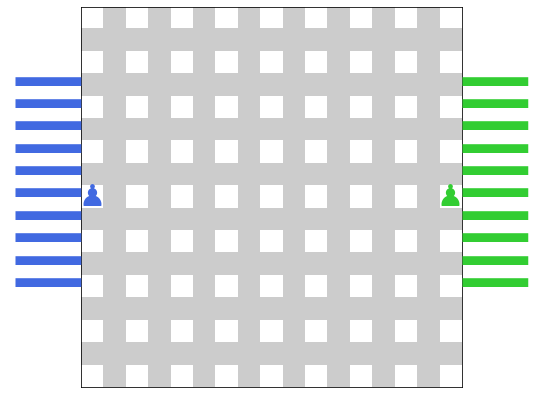

[[9, 0], [9, 0]]
AUMENTA RACHA GANADORA 2 1
Las Cobras team moved to node: 37


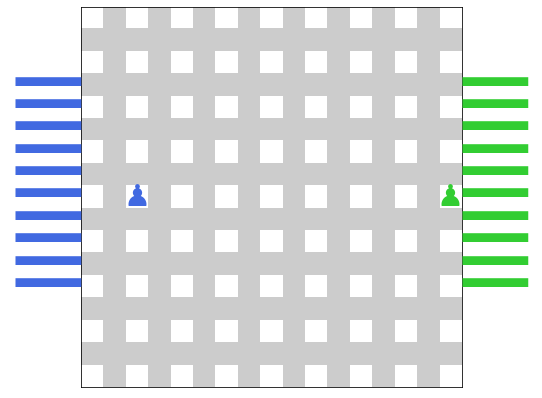

[[9, 1], [9, 0]]
AUMENTA RACHA GANADORA 2 1
La Brigada team moved to node: 43


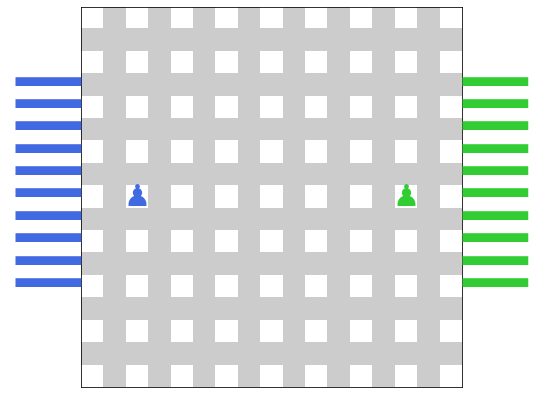

[[9, 1], [9, 1]]
Las Cobras team moved to node: 38
AUMENTA RACHA GANADORA 2


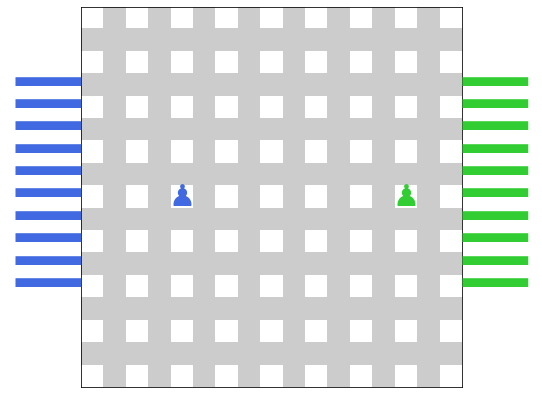

[[9, 2], [9, 1]]
La Brigada team moved to node: 42
AUMENTA RACHA GANADORA 2


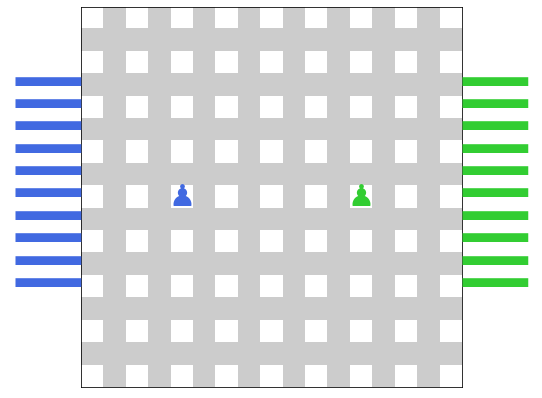

[[9, 2], [9, 2]]
AUMENTA RACHA GANADORA 2 3
Las Cobras team moved to node: 39


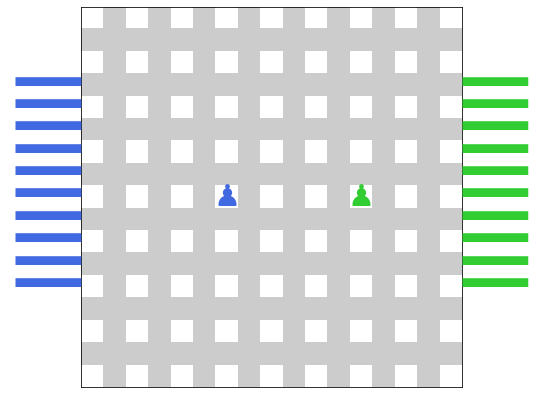

[[9, 3], [9, 2]]
La Brigada team placed a wall
La Brigada Team has: 9 walls left
PUSE LA PARE 3


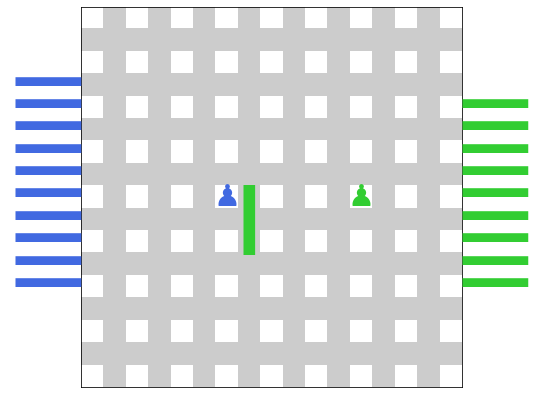

[[7, 0], [9, 2]]
AUMENTA RACHA GANADORA 2 4
Las Cobras team moved to node: 30


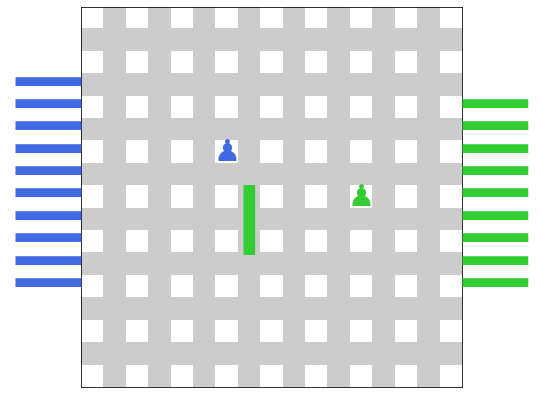

[[7, 1], [9, 2]]
La Brigada team moved to node: 33
AUMENTA RACHA GANADORA 4


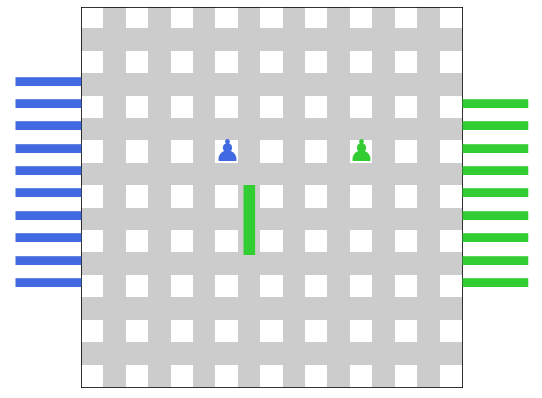

[[7, 1], [9, 3]]
Las Cobras team placed a wall
Las Cobras Team has: 9 walls left
PUSE LA PARE 5


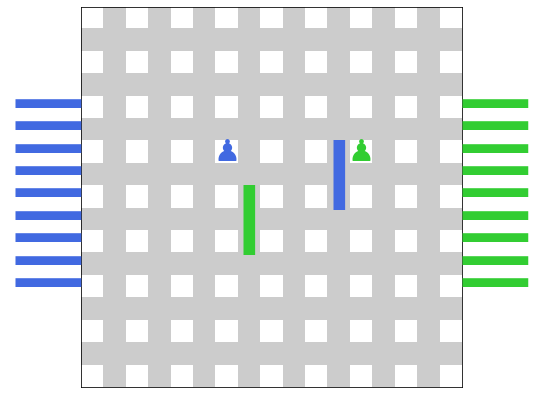

[[7, 1], [8, 0]]
AUMENTA RACHA GANADORA 2 5
La Brigada team moved to node: 24


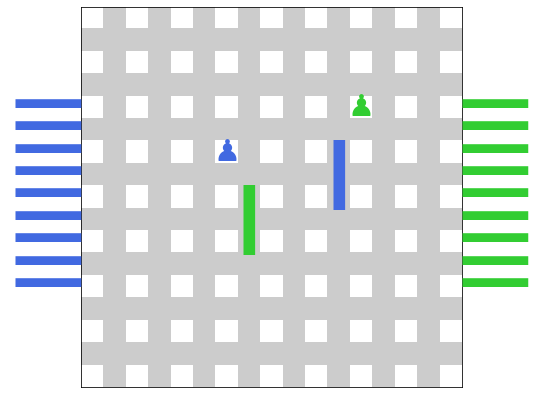

[[7, 1], [8, 1]]
AUMENTA RACHA GANADORA 2 6
Las Cobras team moved to node: 21


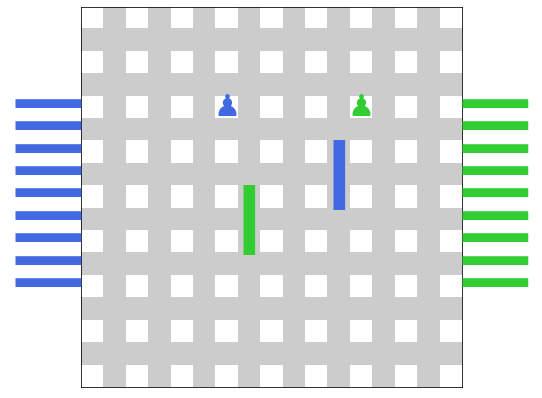

[[7, 2], [8, 1]]
La Brigada team moved to node: 23
AUMENTA RACHA GANADORA 6


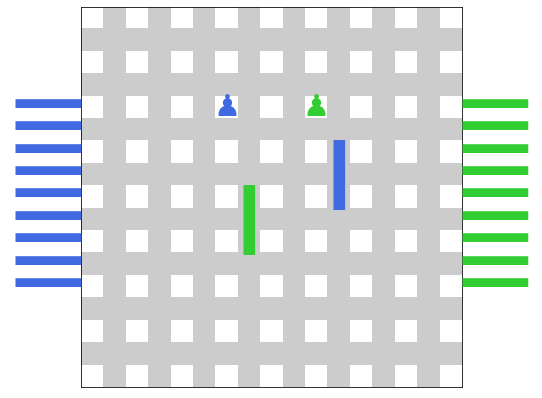

[[7, 2], [8, 2]]
Las Cobras team moved to node: 22
AUMENTA RACHA GANADORA 7


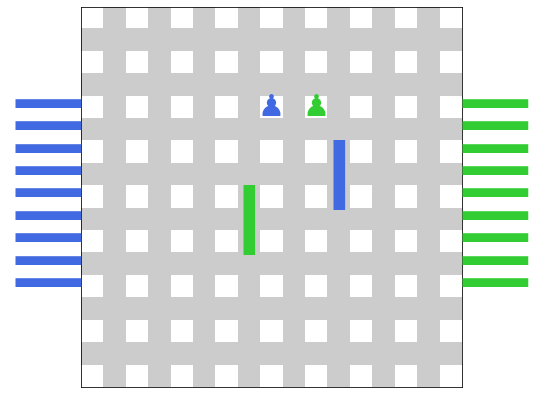

[[7, 3], [8, 2]]
La Brigada team placed a wall
La Brigada Team has: 8 walls left
PUSE LA PARE 7


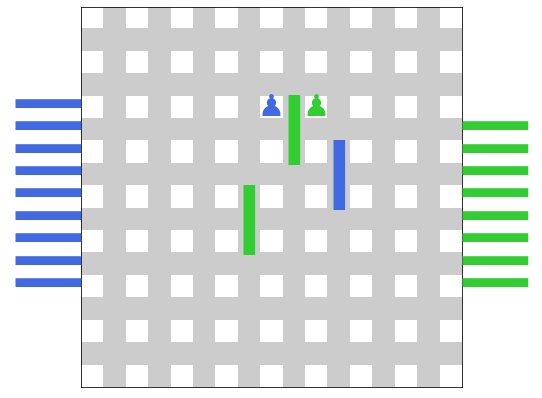

[[6, 0], [8, 2]]
AUMENTA RACHA GANADORA 2 8
Las Cobras team moved to node: 13


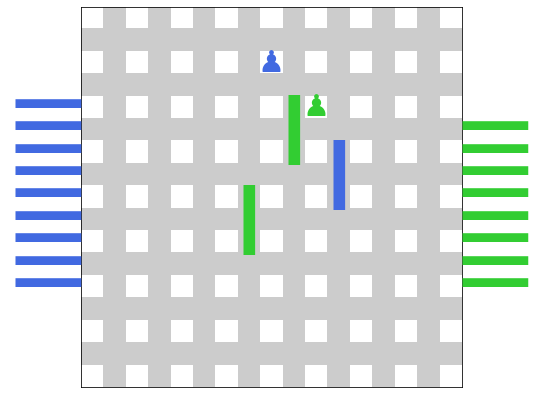

[[6, 1], [8, 2]]
La Brigada team moved to node: 14
AUMENTA RACHA GANADORA 8


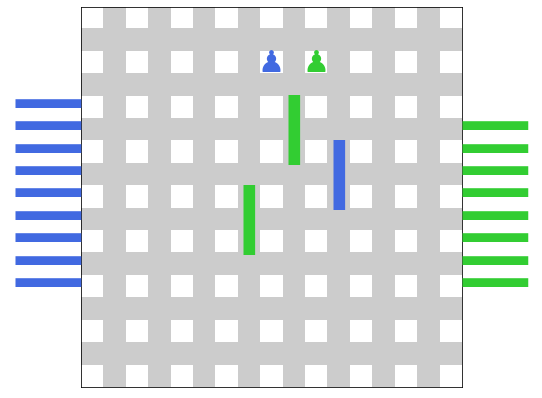

[[6, 1], [8, 3]]
PUSE LA PARE 9


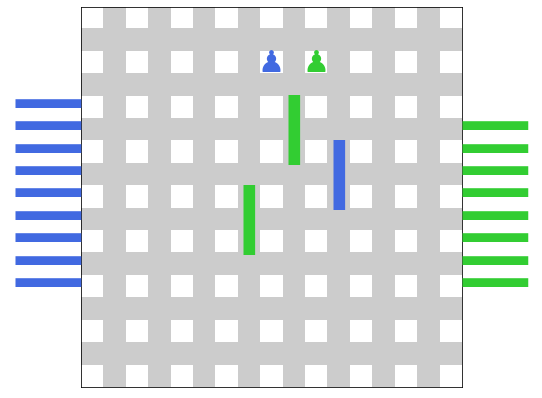

[[6, 1], [6, 0]]
AUMENTA RACHA GANADORA 2 9
La Brigada team moved to node: 4
Ya me movi


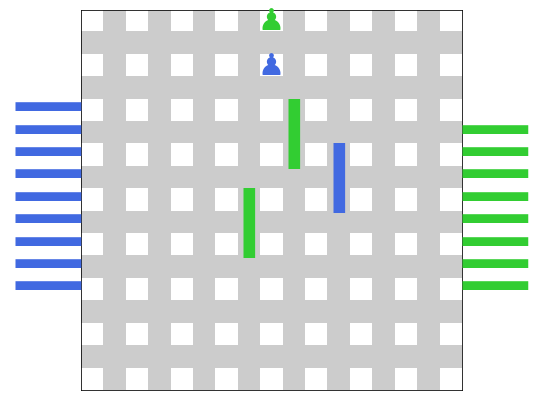

[[6, 1], [6, 1]]
Las Cobras team moved to node: 14
AUMENTA RACHA GANADORA 10


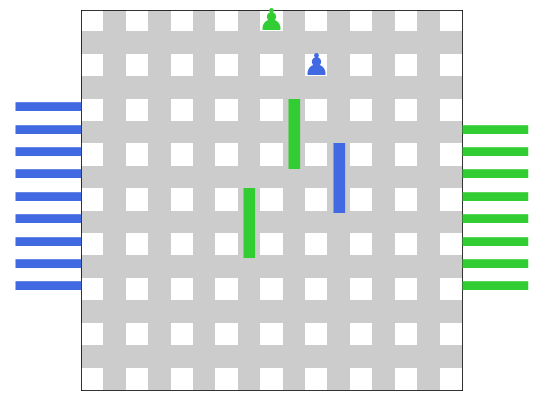

[[6, 2], [6, 1]]
La Brigada team moved to node: 3
AUMENTA RACHA GANADORA 10


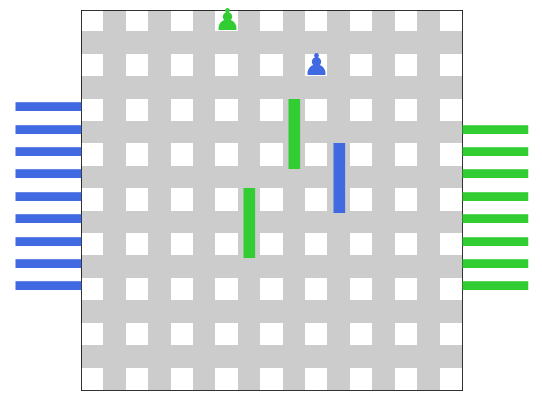

[[6, 2], [6, 2]]
AUMENTA RACHA GANADORA 2 11
Las Cobras team moved to node: 15


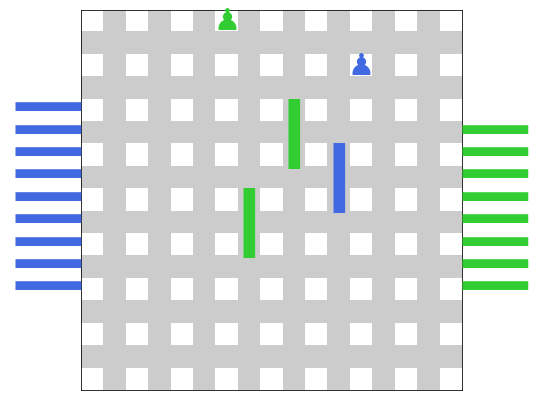

[[6, 3], [6, 2]]
La Brigada team placed a wall
La Brigada Team has: 7 walls left
PUSE LA PARE 11


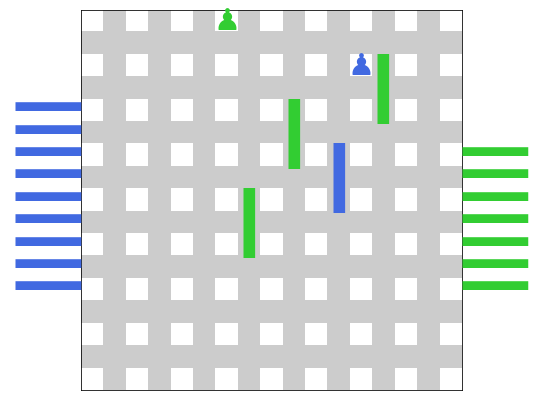

[[4, 0], [6, 2]]
AUMENTA RACHA GANADORA 2 12
Las Cobras team moved to node: 6


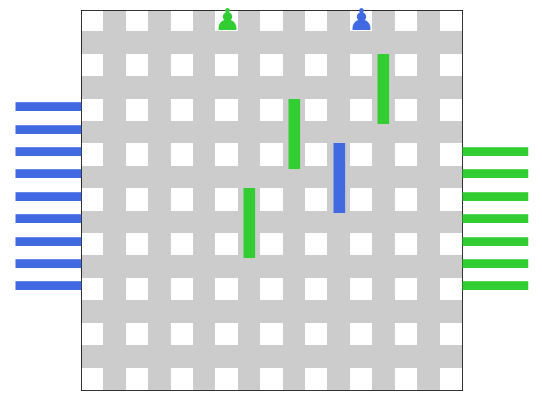

[[4, 1], [6, 2]]
AUMENTA RACHA GANADORA 2 12
La Brigada team moved to node: 2


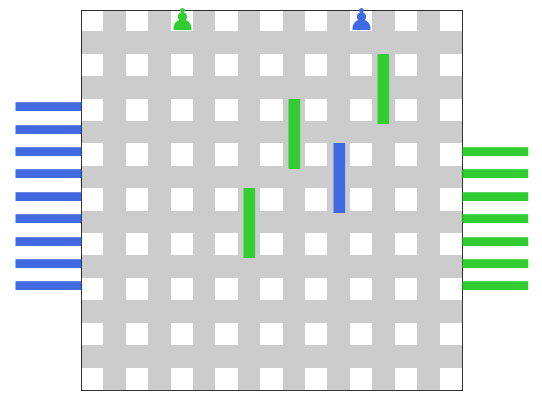

[[4, 1], [6, 3]]
Las Cobras team placed a wall
Las Cobras Team has: 8 walls left
PUSE LA PARE 13


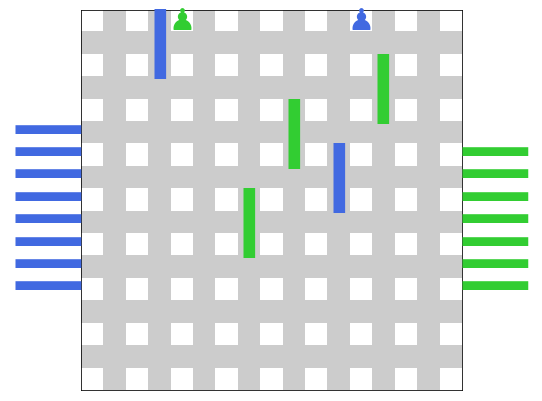

[[4, 1], [5, 0]]
AUMENTA RACHA GANADORA 2 13
La Brigada team moved to node: 11


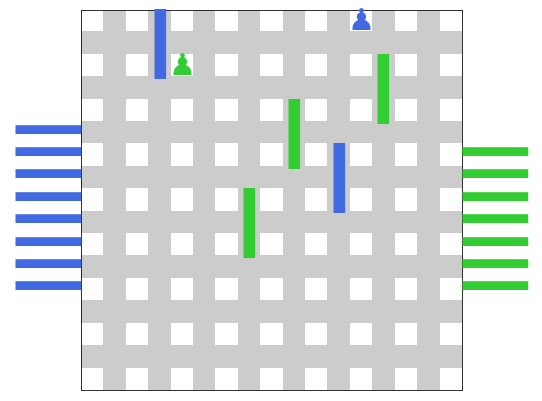

[[4, 1], [5, 1]]
Las Cobras team moved to node: 7
AUMENTA RACHA GANADORA 14


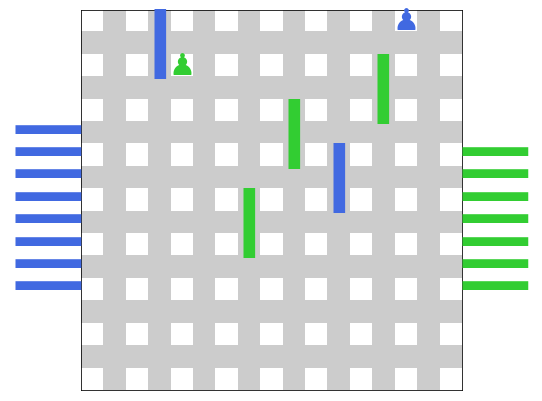

[[4, 2], [5, 1]]
La Brigada team moved to node: 20
AUMENTA RACHA GANADORA 14


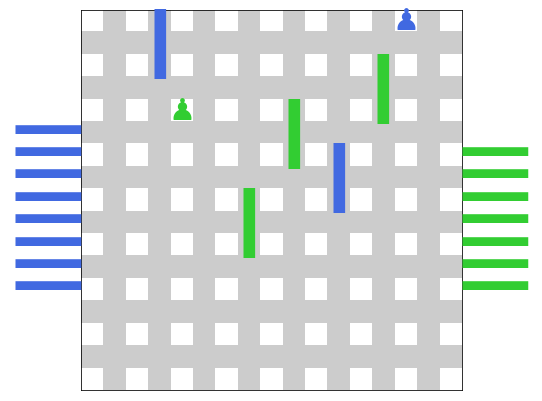

[[4, 2], [5, 2]]
AUMENTA RACHA GANADORA 2 15
Las Cobras team moved to node: 8


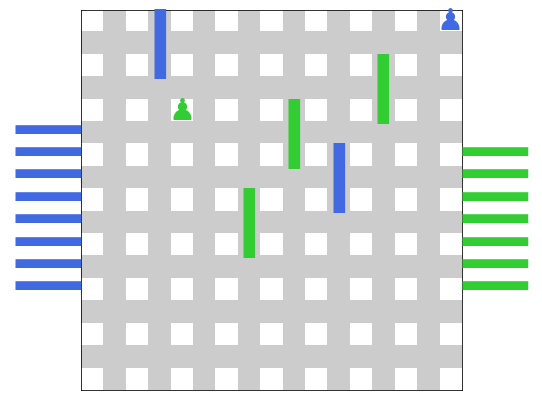

GAME OVER
Las Cobras team wins


In [17]:
#TEST CASE 3:
#2 BOTS PATH LENGTH BASED ALGORITHM
if test3:
    winner = False
    nop = 2
    g = Game(nop)
    g.startGame()
    turno = 1
    paths[0] = bfspath2.findPathBFS(adj, p.players[0])
    paths[1] = bfspath2.findPathBFS(adj, p.players[1])

    contadores = initCont(contadores, nop, paths)
    while winner == False:
        for i in range(nop):
            updatePaths(paths, p.players, adj)
            leaderboard = setLeaderboard(paths)
            if i == 0:
                adj, mat, contadores = p.players[i].pathlength_turn(p.players, paths, nop, adj, mat, turno, contadores, i, leaderboard)
            else:
                adj, mat, contadores = p.players[i].pathlength_turn(p.players, paths, nop, adj, mat, turno, contadores, i, leaderboard)
            if(g.game() == True):
                winner = True
                break
        turno += 1
        

In [18]:
#TEST CASE 4:
# 4 Uncertainty principle
if test4:
    winner = False
    nop = 4
    g = Game(nop)
    g.startGame()

    while winner == False:
        for i in range(nop):
            updatePaths(paths, p.players, adj)
            leaderboard = setLeaderboard(paths)
            adj, mat = p.players[i].uncertainty_principle(paths, leaderboard, p.players, i, adj, mat)
            showPositions(leaderboard)
            if(g.game() == True):
                winner = True
                break

In [19]:
#TEST CASE 5:
# 2 Uncertainty principle vs 2 Greedy
if test5:
    winner = False
    nop = 4
    g = Game(nop)
    g.startGame()

    while winner == False:
        for i in range(nop):
            updatePaths(paths, p.players, adj)
            leaderboard = setLeaderboard(paths)
            if i == 0 or i == 1:
                adj, mat = p.players[i].think_greedy(paths, leaderboard, p.players, i, adj, mat)
            else:
                adj, mat = p.players[i].uncertainty_principle(paths, leaderboard, p.players, i, adj, mat)
            if(g.game() == True):
                winner = True
                break